# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the Precipitation time series for all stations from 1911-2017 into a pandas dataframe

In [30]:
path = '/content/drive/MyDrive/Camels Aus Data/01_precipitation_timeseries/precipitation_AWAP.csv'
precipitation = pd.read_csv(path)
precipitation.head()

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,1911,1,1,0.888937,0.962078,0.000000,3.607211,58.983962,93.164405,12.994770,...,22.462664,9.867105,29.163801,21.748507,21.612414,16.292019,10.060676,8.155037,15.895292,4.410816
1,1911,1,2,0.053859,0.037026,0.000000,14.059860,54.456531,89.740990,19.546571,...,1.468122,1.168421,3.139981,2.966952,3.363784,3.210563,1.054609,0.401752,2.117937,0.000000
2,1911,1,3,0.000000,0.000000,0.000770,9.102234,41.708021,52.847664,28.447242,...,0.000000,0.000000,0.722172,0.325273,0.359418,0.000000,0.000000,0.000000,0.119507,0.000000
3,1911,1,4,0.476637,0.332981,6.305955,4.966879,7.385524,13.810901,7.924598,...,0.000000,0.289474,0.042437,0.062430,0.047346,0.000000,0.000000,0.000000,0.042227,0.000000
4,1911,1,5,6.306126,5.203618,10.498203,53.808934,6.098953,10.244216,6.697174,...,0.000000,0.256579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
precipitation.tail()

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
39077,2017,12,27,0.007805,0.008615,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
39078,2017,12,28,0.113682,0.112780,0.180698,0.0,0.023337,0.0,0.0,...,0.000546,0.000000,0.298513,0.582028,0.686986,0.200000,0.244697,0.040876,0.494170,2.022991
39079,2017,12,29,0.677345,0.592273,7.286499,0.0,0.000218,0.0,0.0,...,0.000000,0.032895,0.073174,0.002128,0.000000,0.000000,0.000000,0.033285,0.000000,0.065266
39080,2017,12,30,0.184562,0.158107,0.000000,0.0,0.000000,0.0,0.0,...,5.974345,0.542105,10.588106,10.680200,10.554620,5.012441,2.439092,3.537737,4.004709,0.644252
39081,2017,12,31,0.049491,0.017599,0.069815,0.0,0.000000,0.0,0.0,...,2.011572,0.950000,3.431965,5.228732,5.743836,3.168779,1.731033,1.042993,3.425037,0.000000


In [32]:
precipitation.shape

(39082, 225)

# Slicing the data frame to get data for the period 1975-2014

In [33]:
precipitation.query("year==1975 & month==1 & day==1")

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
23376,1975,1,1,14.76845,15.400526,7.766581,11.047862,12.543816,20.300667,10.5386,...,0.710917,0.443421,3.032288,1.452173,1.529452,0.437089,0.259472,0.0,0.648057,0.309518


In [34]:
precipitation.query("year==2014 & month==12 & day==31")

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
37985,2014,12,31,0.0,0.0,3.654774,0.03612,7.412031,12.02664,7.621047,...,14.8059,7.963158,14.235294,11.06713,9.844435,8.027465,4.527837,3.772628,6.044245,0.40173


In [35]:
precipitation = precipitation.iloc[23376:37985,:]
precipitation.head()

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
23376,1975,1,1,14.768450,15.400526,7.766581,11.047862,12.543816,20.300667,10.538600,...,0.710917,0.443421,3.032288,1.452173,1.529452,0.437089,0.259472,0.000000,0.648057,0.309518
23377,1975,1,2,21.695153,21.676697,11.468532,11.276005,11.501742,19.800389,18.454910,...,0.192249,0.200000,1.465029,1.366716,1.601884,1.853286,0.671329,0.000000,1.747160,0.000371
23378,1975,1,3,0.664716,0.648427,12.759600,6.568283,1.487908,2.471580,2.961489,...,0.037882,0.672368,1.006917,0.106769,0.107192,0.011737,0.000000,0.000000,0.000747,0.000000
23379,1975,1,4,1.555388,1.267205,24.420072,11.219081,12.700932,15.341491,18.918323,...,0.006114,0.368421,0.806109,0.839166,0.989041,0.830047,0.233025,0.674234,0.542900,1.456304
23380,1975,1,5,12.809369,13.263832,5.096458,8.570772,13.156909,12.775083,4.580165,...,4.397707,1.903947,9.854525,5.749483,5.354195,1.574648,0.921538,0.146861,2.076981,0.207169


In [36]:
precipitation.shape

(14609, 225)

# Extracting the Annual maximum precipitation values from the time series

In [37]:
precipitation = precipitation.groupby(['year']).max()
precipitation.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,12,31,79.688507,82.203194,47.782392,51.453797,59.667382,84.595217,39.620311,71.638004,...,77.448470,50.034210,93.541855,85.572185,85.827055,64.008920,59.645855,46.997372,69.136323,50.418912
1976,12,31,40.946995,41.825652,135.400668,52.218826,58.442793,70.014517,32.431909,57.523468,...,76.481658,47.836842,76.435455,70.005557,68.631936,38.224648,39.376980,30.774599,43.793050,37.454388
1977,12,31,104.789642,108.094190,57.841838,47.738800,74.070346,108.339822,76.047862,63.565325,...,59.221507,58.664473,60.108824,48.243955,49.977654,64.128170,63.190968,68.150146,71.914050,36.681026
1978,12,31,35.670578,37.184434,46.531519,82.506764,66.706378,83.644883,34.506643,83.023642,...,44.082533,41.435527,54.098837,56.002749,58.862928,54.938733,50.940806,43.453212,55.236398,56.206057
1979,12,31,51.239971,53.505462,67.201848,54.073006,136.915259,159.395385,84.284915,239.727320,...,59.649125,38.347369,57.120491,53.063405,52.432877,64.412676,76.978277,55.592847,78.792376,34.971694


In [38]:
precipitation.tail()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
2010,12,31,47.98073,48.46464,82.94769,64.20153,59.14507,77.14505,55.39241,89.48091,...,44.34585,77.36974,58.356012,52.29500,50.31438,51.40775,73.90440,53.16197,80.13371,72.37182
2011,12,31,84.89642,89.54515,47.44569,82.29738,61.62497,73.95890,88.25639,86.84483,...,58.47948,114.74080,52.809728,53.15347,55.86550,76.69366,103.89930,71.37693,81.70830,111.12660
2012,12,31,68.57727,68.87804,88.64482,86.62068,39.28152,54.31235,31.80677,79.52277,...,32.97118,62.65789,59.335973,45.70000,46.80985,65.61385,66.87355,43.90876,68.96106,54.30637
2013,12,31,23.36075,23.37403,53.48203,69.85297,83.30757,120.60960,98.97540,130.89320,...,45.88570,53.88290,44.989528,64.89814,64.73296,55.90892,71.11135,49.27854,93.52250,79.48548
2014,12,31,52.94531,53.45870,65.04928,53.81308,65.44393,192.70020,45.25523,95.58004,...,69.32216,42.06316,73.816645,64.28197,61.73639,52.41948,57.06707,37.26701,65.79761,60.61292


In [39]:
precipitation.shape

(40, 224)

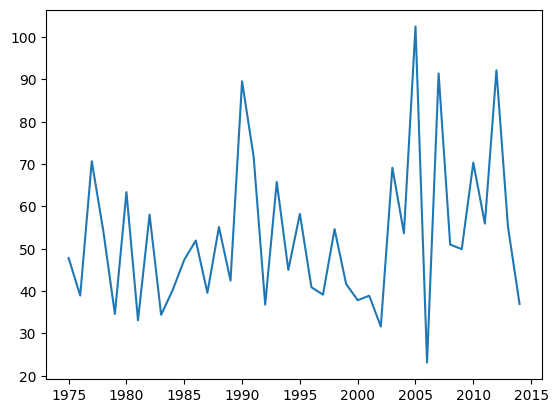

In [40]:
plt.plot(precipitation.iloc[:,47])

# Using the same stations as final streamflow quantile values

In [15]:
cols = [ '915011A',
'919003A',
'919309A',
'922101B',
'926002A',
'G9030250',
'G9070142',
'A0020101',
'A0030501',
'401012',
'401203',
'401208',
'401210',
'401212',
'401216',
'401217',
'402206',
'403209A',
'403213A',
'403214',
'403217',
'403232',
'405205',
'405209',
'405215',
'405218',
'405219',
'405251',
'405263',
'407214',
'407253',
'410057',
'410061',
'410705',
'410730',
'410731',
'410761',
'412028',
'412066',
'415207',
'416003',
'416008',
'418014',
'419005',
'422313B',
'422334A',
'422394A',
'424002',
'424201A',
'102101A',
'104001A',
'105101A',
'105102A',
'107001B',
'108002A',
'108003A',
'112002A',
'112102A',
'113004A',
'116006B',
'116010A',
'116011A',
'121001A',
'137101A',
'137201A',
'138009A',
'143009A',
'143303A',
'145018A',
'146010A',
'146014A',
'146095A',
'A5030502',
'A5040517',
'A5130501',
'204034',
'206014',
'206018',
'208007',
'208009',
'210006',
'210011',
'212209',
'212260',
'215004',
'215207',
'216002',
'218001',
'219001',
'221207',
'222213',
'223202',
'224206',
'224213A',
'224214A',
'225020A',
'225110A',
'225219',
'226220',
'226222',
'226407',
'227225A',
'227226',
'227227',
'229661A',
'235205',
'238208',
'A2390523',
'604053',
'606001',
'606002',
'606185',
'607155',
'608002',
'610008',
'613146',
'616013',
'803003',
'804001',
'G8110004',
'G8110016',
'G8140001',
'G8140161',
'G8170002',
'G8200045',
'G8210010',
'304497',
'304499',
'307473',
'308145',
'308799',
'312061',
'314207',
'314213',
'315450',
'318076']

In [41]:
tempstations = ['915011A',
'919003A',
'919201A',
'919309A',
'922101B',
'925001A',
'926002A',
'G9030124',
'G9030250',
'G9070142',
'A0020101',
'A0030501',
'401009',
'401012',
'401203',
'401208',
'401210',
'401212',
'401216',
'401217',
'402204',
'402206',
'402213',
'402217',
'403209A',
'403213A',
'403214',
'403217',
'403226',
'403232',
'404207',
'405205',
'405209',
'405215',
'405217',
'405218',
'405219',
'405226',
'405238',
'405245',
'405251',
'405263',
'405274',
'406208',
'406213',
'406214',
'407214',
'407215',
'407253',
'408202',
'410057',
'410061',
'410705',
'410730',
'410731',
'410761',
'412028',
'412050',
'412066',
'415207',
'416003',
'416008',
'418005',
'418014',
'419005',
'422202B',
'422313B',
'422334A',
'422394A',
'424002',
'424201A',
'102101A',
'104001A',
'105101A',
'105102A',
'105105A',
'107001B',
'108002A',
'108003A',
'112002A',
'112102A',
'113004A',
'116006B',
'116010A',
'116011A',
'116012A',
'116013A',
'121001A',
'122004A',
'126003A',
'137101A',
'137201A',
'138009A',
'138113A',
'143009A',
'143303A',
'145010A',
'145018A',
'145101D',
'145107A',
'146010A',
'146012A',
'146014A',
'146095A',
'A5030502',
'A5040517',
'A5040523',
'A5130501',
'204034',
'206014',
'206018',
'208007',
'208009',
'210006',
'210011',
'211008',
'212209',
'212260',
'215002',
'215004',
'215207',
'216002',
'216004',
'218001',
'219001',
'221207',
'221210',
'222213',
'223202',
'224206',
'224213A',
'224214A',
'225020A',
'225110A',
'225219',
'226220',
'226222',
'226407',
'227225A',
'227226',
'227227',
'229661A',
'231213',
'235205',
'238208',
'A2390523',
'604053',
'606001',
'606002',
'606185',
'607155',
'608002',
'610008',
'613146',
'616013',
'803003',
'804001',
'G8110004',
'G8110016',
'G8140001',
'G8140161',
'G8170002',
'G8190001',
'G8200045',
'G8210010',
'302214',
'304497',
'304499',
'305202',
'307473',
'308145',
'308799',
'312061',
'314207',
'314213',
'315450',
'318076']

In [42]:
temp_prec = precipitation
temp_prec.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,12,31,79.688507,82.203194,47.782392,51.453797,59.667382,84.595217,39.620311,71.638004,...,77.448470,50.034210,93.541855,85.572185,85.827055,64.008920,59.645855,46.997372,69.136323,50.418912
1976,12,31,40.946995,41.825652,135.400668,52.218826,58.442793,70.014517,32.431909,57.523468,...,76.481658,47.836842,76.435455,70.005557,68.631936,38.224648,39.376980,30.774599,43.793050,37.454388
1977,12,31,104.789642,108.094190,57.841838,47.738800,74.070346,108.339822,76.047862,63.565325,...,59.221507,58.664473,60.108824,48.243955,49.977654,64.128170,63.190968,68.150146,71.914050,36.681026
1978,12,31,35.670578,37.184434,46.531519,82.506764,66.706378,83.644883,34.506643,83.023642,...,44.082533,41.435527,54.098837,56.002749,58.862928,54.938733,50.940806,43.453212,55.236398,56.206057
1979,12,31,51.239971,53.505462,67.201848,54.073006,136.915259,159.395385,84.284915,239.727320,...,59.649125,38.347369,57.120491,53.063405,52.432877,64.412676,76.978277,55.592847,78.792376,34.971694


In [43]:
for col in temp_prec.columns:
    # Check if the column is not in the array of column names
    if col not in tempstations:
        # Drop the column from the DataFrame
        temp_prec.drop(columns=col, inplace=True)

temp_prec.shape

(40, 177)

In [44]:
temp_prec.to_csv('precipitation_values.csv')

# Dropping the columns with columns other than columns in cols

In [16]:
for col in precipitation.columns:
    # Check if the column is not in the array of column names
    if col not in cols:
        # Drop the column from the DataFrame
        precipitation.drop(columns=col, inplace=True)

precipitation.shape

(40, 136)

# Detrending all the precipitation timeseries for all the stations

In [58]:
# for col in cols:
#   time_series = precipitation[col]
#   trendline_coefficients = np.polyfit(np.arange(len(time_series)), time_series, 1)
#   trendline = np.polyval(trendline_coefficients, np.arange(len(time_series)))
#   precipitation[col] = time_series - trendline


# plt.figure(figsize=(10, 6))
# plt.plot(np.arange(40),time_series, label='Original Time Series')
# plt.plot(np.arange(40),trendline, label='Trendline', linestyle='--', color='red')
# plt.plot(np.arange(40),detrended_time_series, label='Detrended Time Series')
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Detrending a Time Series')
# plt.show()


In [17]:
precipitation.head()

,915011A,919003A,919309A,922101B,926002A,G9030250,G9070142,A0020101,A0030501,401012,...,304497,304499,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1975,47.782392,59.667382,39.620311,71.638004,96.709917,41.905364,92.138000,23.025792,26.102431,54.917670,...,55.555642,77.448470,93.541855,85.572185,85.827055,64.008920,59.645855,46.997372,69.136323,50.418912
1976,135.400668,58.442793,32.431909,57.523468,85.650872,106.900762,45.491424,32.705732,30.360332,45.855334,...,45.965758,76.481658,76.435455,70.005557,68.631936,38.224648,39.376980,30.774599,43.793050,37.454388
1977,57.841838,74.070346,76.047862,63.565325,67.780625,34.553186,61.146848,43.144752,52.100060,27.479235,...,51.725292,59.221507,60.108824,48.243955,49.977654,64.128170,63.190968,68.150146,71.914050,36.681026
1978,46.531519,66.706378,34.506643,83.023642,85.229844,52.115997,38.669711,43.505519,40.174976,54.506093,...,44.323865,44.082533,54.098837,56.002749,58.862928,54.938733,50.940806,43.453212,55.236398,56.206057
1979,67.201848,136.915259,84.284915,239.727320,155.881264,67.185084,47.736974,19.859837,31.610863,26.190456,...,40.903372,59.649125,57.120491,53.063405,52.432877,64.412676,76.978277,55.592847,78.792376,34.971694


# Ad-Fuller test to test the stationarity of the precipitation time series at each station

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    result = adfuller(ts)

    adf_statistic = result[0]
    p_value = result[1]

    significance_levels = {
        1: 0.01,
        5: 0.05,
        10: 0.1
    }

    # print(f'ADF Statistic: {adf_statistic}')
    # print(f'p-value: {p_value}')

    for level, significance_level in significance_levels.items():
        if p_value < significance_level:
            # print(f'Null hypothesis rejected at {level}% significance level. Series is stationary.')
            return 1
    else:
        # print('Failed to reject null hypothesis. Series may be non-stationary.')
      return 0

In [19]:
num_stationary_stations = 0
non_stationary_stations = []
stationary_stations = []
for name in cols:
  if(test_stationarity(precipitation[name])==1):
    num_stationary_stations = num_stationary_stations + 1
    stationary_stations.append(name)
  else:
    non_stationary_stations.append(name)

print(stationary_stations)
print(num_stationary_stations)
print(non_stationary_stations)
print(len(non_stationary_stations))

['915011A', '919003A', '919309A', '922101B', '926002A', 'G9030250', 'G9070142', 'A0020101', 'A0030501', '401203', '401208', '401210', '401212', '401216', '401217', '402206', '403209A', '403213A', '403214', '403217', '403232', '405205', '405209', '405215', '405218', '405219', '405251', '405263', '407214', '407253', '410057', '410061', '410705', '410730', '410731', '410761', '412028', '412066', '415207', '416008', '419005', '422313B', '422394A', '424002', '424201A', '102101A', '104001A', '105101A', '105102A', '107001B', '108002A', '108003A', '112002A', '112102A', '113004A', '116006B', '116010A', '116011A', '121001A', '137101A', '137201A', '138009A', '143303A', '145018A', '146010A', '146014A', '146095A', 'A5030502', 'A5040517', 'A5130501', '204034', '206014', '206018', '208007', '208009', '210006', '210011', '212209', '212260', '215004', '215207', '216002', '218001', '219001', '221207', '223202', '224206', '224213A', '224214A', '225020A', '225110A', '225219', '226220', '226222', '226407',

# Priting and plotting to understand

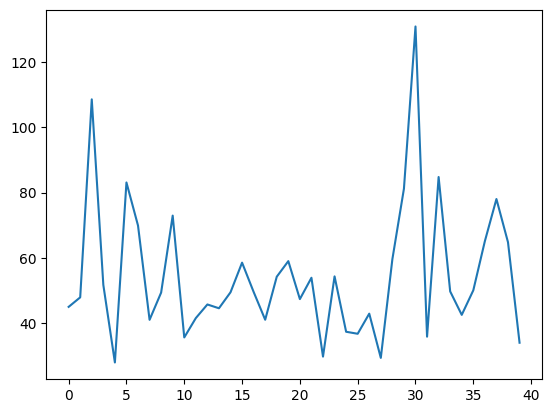

In [20]:
plt.plot(np.arange(40),precipitation.iloc[:,98])

In [21]:
zero_values = (precipitation <= 0).any().any()

In [22]:
zero_values

False

# Fitting a GEV Distribution and calculating quantiles

In [24]:
from scipy.stats import genextreme

results = []

for name in cols:
    shape, loc, scale = genextreme.fit(precipitation[name])

    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [genextreme.ppf(q, shape, loc, scale) for q in quantiles]

    station_dict = {
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gev = pd.DataFrame(results)


In [25]:
All_Station_Quantiles_gev.head()

,Station,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,-0.218057,52.705225,16.264419,33.514945,36.834284,40.302191,42.984928,45.353285,47.577488,58.911028
1,919003A,-0.006509,54.469546,19.544590,27.927663,33.101836,38.212891,41.980469,45.182960,48.092395,61.641442
2,919309A,-0.096363,47.535273,14.418281,29.105711,32.523278,35.980506,38.581793,40.828777,42.899114,52.914188
3,922101B,-0.594211,77.734171,25.389902,54.003444,57.268059,61.036219,64.211489,67.209584,70.196135,88.130974
4,926002A,-0.077070,86.539014,24.707751,54.547351,60.544486,66.580281,71.101780,74.993975,78.569350,95.723836


# Conducting a GOF test for all the fitted GEV Distributions

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme, kstest


results = []
significant_count = 0
significance_level = 0.05

def fit_gev(data):
    # Remove zeros or negative values (if any)
    data = data[data > 0]
    shape, loc, scale = genextreme.fit(data)
    return shape, loc, scale

for name in cols:
    data = precipitation[name]
    shape, loc, scale = fit_gev(data)

    statistic, p_value = kstest(data, 'genextreme', args=(shape, loc, scale))

    results.append({
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1

results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Generalized Extreme Value Distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)

Number of stations fitting the Generalized Extreme Value Distribution within a significance level of 0.05: 135


In [27]:
All_Station_Quantiles_gev.to_csv('precipitation_quantiles_gev.csv')

# Fitting a gumble max probability distribution to the detrended precipitation time series at each station

In [22]:
from scipy.stats import gumbel_r

results = []

for name in cols:
    loc, scale = gumbel_r.fit(precipitation[name])

    fitted_distribution = gumbel_r(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_distribution.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'Loc': loc,
        'Scale': scale
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_rainfall_Quantiles_gumbel = pd.DataFrame(results)

In [23]:
All_Station_rainfall_Quantiles_gumbel.head()

,Station,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,912105A,38.353489,17.158367,14.948540,19.527523,24.042855,27.366353,30.188080,32.748979,44.642253
1,915011A,54.721577,18.158197,29.952805,34.798609,39.577052,43.094213,46.080364,48.790488,61.376791
2,919003A,54.538855,19.579762,27.830990,33.056161,38.208698,42.001210,45.221140,48.143434,61.715091
3,919201A,73.318570,24.925564,39.318739,45.970522,52.529841,57.357810,61.456868,65.177027,82.454111
4,919309A,48.294264,14.990217,27.846789,31.847167,35.791936,38.695474,41.160644,43.397945,53.788372


In [24]:
All_Station_rainfall_Quantiles_gumbel.shape

(165, 10)

# Conducting the Goodness of Fit test: KS test for all the stations

In [25]:
import pandas as pd
from scipy.stats import gumbel_r, kstest

# Placeholder DataFrame for example
# AMS_nonull_detrended_stationary = ...

results = []
significant_count = 0
significance_level = 0.05

for name in cols:
    data = precipitation[name]
    loc, scale = gumbel_r.fit(data)

    # K-S test
    statistic, p_value = kstest(data, 'gumbel_r', args=(loc, scale))

    # Add results to the list
    results.append({
        'Station': name,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1

results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Gumbel distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Gumbel distribution within a significance level of 0.05: 165


# Saving the precipitation quantile values into a csv files

In [27]:
All_Station_rainfall_Quantiles_gumbel.to_csv('precipitation__quantiles.csv')